# 1D GP Regression Demo

In [59]:
import sys
sys.path.insert(0,'/home/emmanuel/projects/2019_sakame/src')

In [86]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from data.make_dataset import ToyData
from models.gp_demo import DemoGP1D
from models.derivatives import GPRBFDerivative

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Sample Data

We have a few options regarding the sample functions:

* Linear
* Sin
* Sinc
* Polynomial
* X Sin

In [149]:
demo_model = DemoGP1D()

noise = 0.2
num_points = 75

x, y = demo_model.get_1d_data(noise=noise, num_points=num_points)

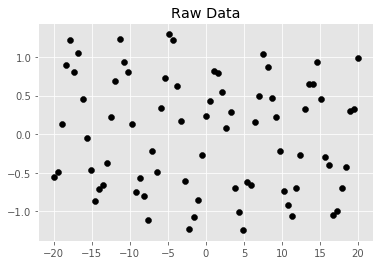

In [150]:
fig, ax = plt.subplots()

ax.scatter(x, y, color='Black')
ax.set_title('Raw Data')
plt.show()

## Train GP

In [151]:
%%time 

demo_model.train_gp(x, y)

CPU times: user 4.63 s, sys: 2 ms, total: 4.63 s
Wall time: 295 ms


In [152]:
ypred, y_std = demo_model.model.predict(x, return_std=True)

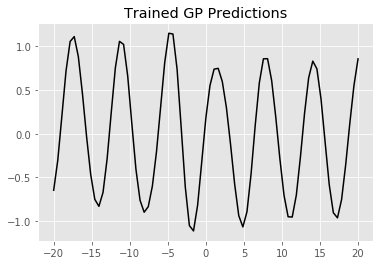

In [153]:
fig, ax = plt.subplots()

ax.plot(x, ypred, color='Black')
ax.set_title('Trained GP Predictions')
plt.show()

## Derivative

In [154]:
%%time

der_model = GPRBFDerivative(demo_model.model)

x_der = der_model(x)

CPU times: user 1.8 ms, sys: 0 ns, total: 1.8 ms
Wall time: 1.58 ms


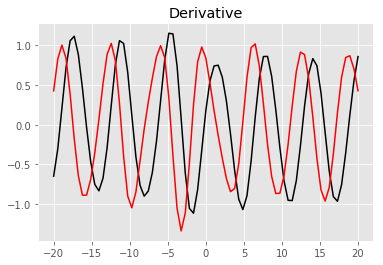

In [155]:
fig, ax = plt.subplots()

ax.plot(x, ypred, color='black')
ax.plot(x, x_der, color='red')
ax.set_title('Derivative')

plt.show()

## Sensitivity

In [156]:
%%time

x_sens = der_model.point_sensitivity(x)

CPU times: user 1.02 ms, sys: 0 ns, total: 1.02 ms
Wall time: 870 µs


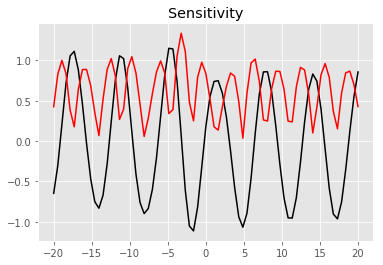

In [157]:
fig, ax = plt.subplots()


ax.plot(x, ypred, color='black')
ax.plot(x, x_sens, color='red')
ax.set_title('Sensitivity')

plt.show()

## For All Functions

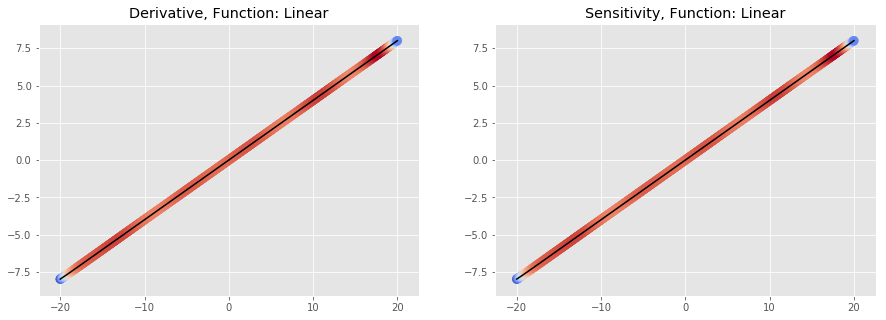

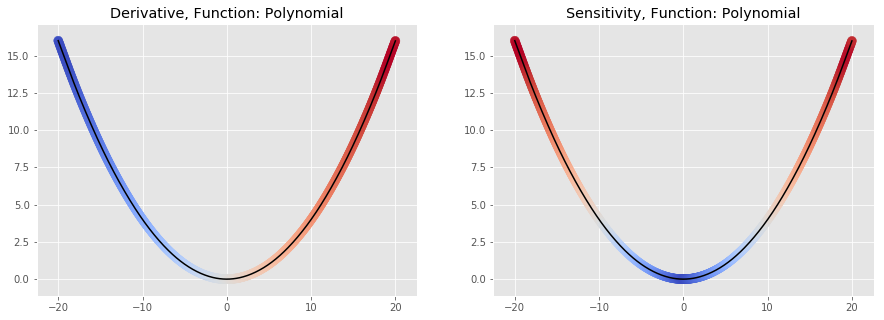

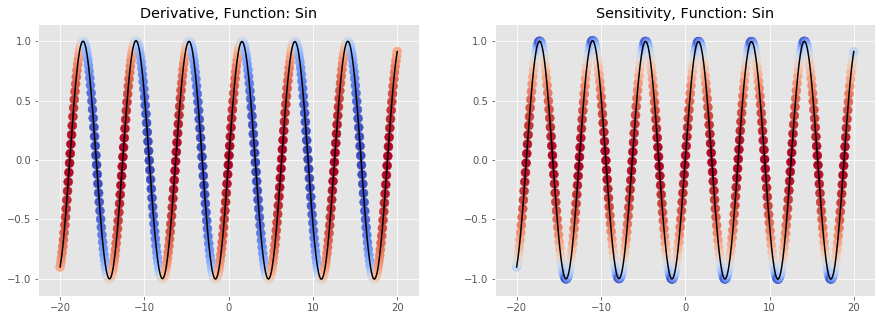

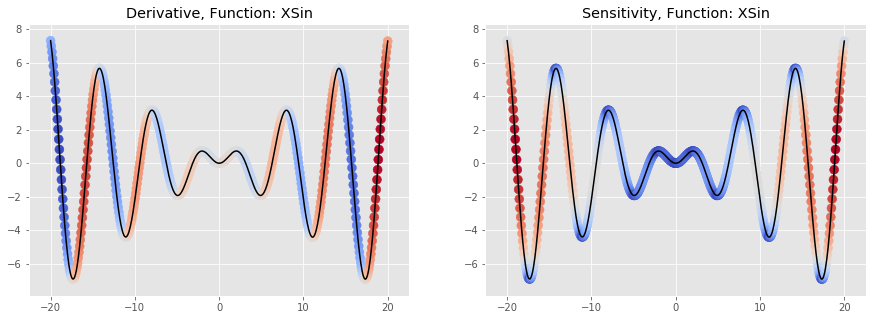

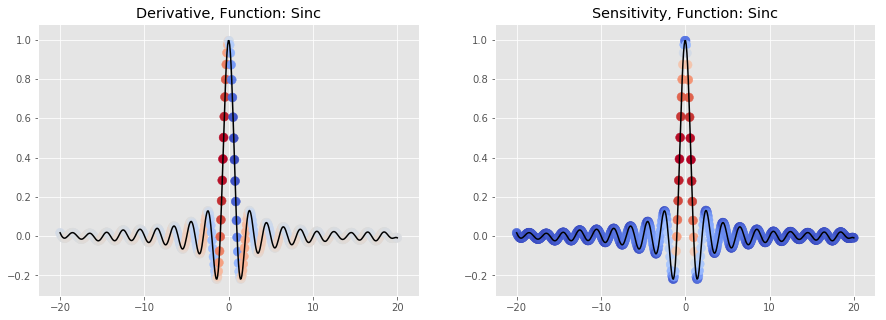

In [180]:
num_points = 500
noise = 0.01
colormap = plt.cm.get_cmap('coolwarm')
funcs = ['lin', 'poly', 'sin', 'xsin', 'sinc']
func_names = ['Linear', 'Polynomial', 'Sin', 'XSin', 'Sinc']
for (iteration, ifunc) in enumerate(funcs):
    # Initialize Demo Class
    demo_model = DemoGP1D()

    # Get Data
    x, y = demo_model.get_1d_data(noise=noise, func=ifunc, num_points=num_points)
        
    # Train GP
    demo_model.train_gp(x, y)
    
    # Predict test points
    ypred = demo_model.model.predict(x)
    
    # Calculate the Derivative
    der_model = GPRBFDerivative(demo_model.model)
    
    x_der = der_model(x).squeeze()
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    ax[0].plot(x, ypred, color='black')
    ax[0].scatter(x, ypred, s=80, c=x_der, cmap=colormap)
    ax[0].set_title(f"Derivative, Function: {func_names[iteration]}")

    
    # Calculate the Sensitivity
    x_sens = der_model.point_sensitivity(x).squeeze()
    
    ax[1].plot(x, ypred, color='black')
    ax[1].scatter(x, ypred, s=80, c=x_sens, cmap=colormap)
    ax[1].set_title(f"Sensitivity, Function: {func_names[iteration]}")

    plt.show()